# Stock Upside Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-24' #input
symbol = '^NSEBANK' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def upside_risk(stock_returns):
    ur = stock_returns[stock_returns > stock_returns.mean()].std(skipna = True) * np.sqrt(252)
    return ur

Text(0, 0.5, 'Upside Risk')

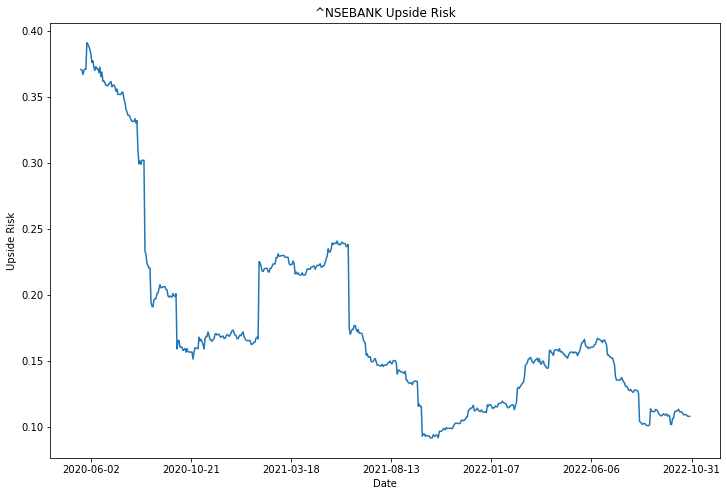

In [12]:
# Compute the running Upside Risk
running = [upside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Upside Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Upside Risk')
plt.xlabel('Date')
plt.ylabel('Upside Risk')

In [7]:
stock_ur = upside_risk(stocks_returns)
stock_ur

0.19930346435209917

In [8]:
running = [upside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.37056810429157916,
 0.37024132872936744,
 0.3667386293352598,
 0.3696292540042752,
 0.3709515266480188,
 0.370857892468028,
 0.3908788376912692,
 0.3896981643657452,
 0.3881987119928049,
 0.3856437478516663,
 0.3822253510952797,
 0.37593006875973317,
 0.377079079017859,
 0.3721719166949842,
 0.36992611296215244,
 0.3727583740277581,
 0.37107221721956885,
 0.37107221721956885,
 0.3681276776978325,
 0.3723667607477945,
 0.36513583171127945,
 0.36867082700474846,
 0.3615966644371425,
 0.36192095567140503,
 0.3605955091470124,
 0.3585426022020294,
 0.3585426022020294,
 0.35828014192925983,
 0.35945815747653015,
 0.36060177195029836,
 0.36140781697462543,
 0.35745453307772773,
 0.35874609049039013,
 0.35874609049039013,
 0.3574654641815173,
 0.35413774526085084,
 0.3557740722139206,
 0.35169627545896376,
 0.35169627545896376,
 0.35169627545896376,
 0.35169627545896376,
 0.35345733941998186,
 0.353202811921166,
 0.3481884179421589,
 0.3459732967894004,
 0.3405256335919682,
 0.338492586354